Project: Cardiovascular disease and mortaility in the US and Colrado

I intially wanted to look at outcomes in two hospital systems over time. However, De identified data was not available on a patient level. Additionally, I could not find data from individual hospitals over time. 

The first part of my project focused on cardiovascular mortality. I obtained data from National Vital statistics.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [73]:
from unicodedata import normalize
import requests
import csv
import sys
import json
from pathlib import Path
import ast
import urllib.request as request


In [74]:
with request.urlopen('https://chronicdata.cdc.gov/resource/kztq-p2jf.json')as response:
    source=response.read()
    data1=json.loads(source)
    json_data=json.dumps(data1)


In [75]:
with open('data1','w')as f:
    json.dump(data1, f, indent=4, sort_keys=True)
nvss=pd.read_json('data1')
nvss= nvss[['year', 'locationabbr','topic','break_out', 'break_out_category','category','data_value', 'highconfidencelimit', 
            'lowconfidencelimit']]
# Aftwr loading the data I reformatted the column names for easier reading.
nvss=nvss.rename(columns={'locationabbr':'location', 'highconfidencelimit': 'Upper_CI', 'lowconfidencelimit':'Lower_CI',
             'data_value':'deaths_per_100,000'})


I subdivided my data into two dataframes , US and Colorado

In [5]:
us_nvss=nvss[nvss['location']=='US']
us_nvss
CO_nvss=nvss[nvss['location']=='CO']


After isolating the National data and the data from Colorado, I joined the datarames into one for further analysis.
Because of the manner in whci the data is gathered, I could only make comparisons for males, I could not make any further comparisons.

In [101]:
nvss2=pd.concat([us_nvss, CO_nvss], axis=0, ignore_index=False)
nvss2
Overall_nvss=nvss2[nvss2['break_out']=='Overall']
male_nvss=nvss2[nvss2['break_out']=='Male']
#male_nvss
nvss2

,year,location,topic,break_out,break_out_category,category,"deaths_per_100,000",Upper_CI,Lower_CI
0,2010,US,Major Cardiovascular Disease,Other,Race,Cardiovascular Diseases,137.8,137.8,137.8
1,2017,US,Major Cardiovascular Disease,Other,Race,Cardiovascular Diseases,155.1,155.1,155.1
2,2001,US,Coronary Heart Disease,18-24,Age,Cardiovascular Diseases,0.6,0.8,0.4
4,2005,US,Heart Failure,25-44,Age,Cardiovascular Diseases,0.5,0.6,0.4
5,2012,US,Stroke,Other,Race,Cardiovascular Diseases,14.1,14.1,14.1
6,2018,US,Stroke,75+,Age,Cardiovascular Diseases,239.4,239.4,239.4
7,2008,US,Stroke,65+,Age,Cardiovascular Diseases,59.0,59.0,59.0
34,2000,US,Major Cardiovascular Disease,Hispanic,Race,Cardiovascular Diseases,159.1,159.1,159.1
100,2000,US,Major Cardiovascular Disease,Female,Gender,Cardiovascular Diseases,461.4,461.4,461.4
105,2006,US,Major Cardiovascular Disease,Non-Hispanic White,Race,Cardiovascular Diseases,425.0,425.0,425.0


The following graph demonstrates the reduction of cardiovascuarl mortality in males in both the US and Colorado. US appears to have a steaper decline.

[Text(0, 0.5, 'Deaths per 100,000'),
 Text(0.5, 1.0, 'Cardiovascular Mortality in Colorado and the US')]

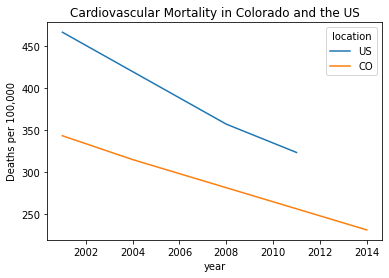

In [78]:
 sns.lineplot(data= male_nvss, x='year', y='deaths_per_100,000', hue='location').set(title="Cardiovascular Mortality in Colorado and the US", ylabel='Deaths per 100,000')


I was able to obtain data from Medicare regarding the prevalence of specific cardiovascular conditions for specific years.
The data had to be downloaded from the website, then uploaded into Jupyter.


In [7]:
# First I uploaded the data into the folder, then read it into jupitor as a dataframe.
Prev2018 = pd.read_excel('Chronic Conditions Prevalence 2018.xlsx',sheet_name='Sheet1')
Prev2016 = pd.read_excel('Chronic Conditions prevalence2016.xlsx',sheet_name='Sheet1')
Prev2014 = pd.read_excel('Chronic Conditions prevalence2014.xlsx',sheet_name='Sheet1')
Prev2012 = pd.read_excel('chronic conditions prevalence2012.xlsx',sheet_name='Sheet1')


After reading the data into the notebook, I combined the individual dataframes into one to make comparisons

In [80]:
Prev = pd.concat([Prev2018, Prev2016, Prev2014, Prev2012], axis=0, ignore_index=False)
PrevCVD=Prev[['Location', 'Year','Atrial Fibrillation', 'Heart Failure', 'Ischemic Heart Disease', 'Stroke']]


The first graph demonstrates the prevalence of Atrial Fibrillation, Heart Failure, Ischemic Heart Disease and Stroke over an 8 year time period.
The scond graph demonstrates the same conditions for the US.
For Colorado, the rate prevalence for all conditions was fairly constant. In reviewing the graph for the US, there appears to be a decline in all conditions between 2016 and 2018. Please note, I did not run a statistical analysis for significance. The observations are solely based on review of the graphs.

Location
Colorado     AxesSubplot(0.125,0.125;0.775x0.755)
National     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

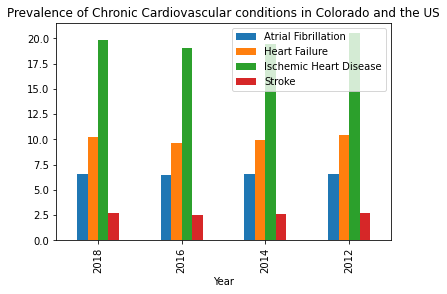

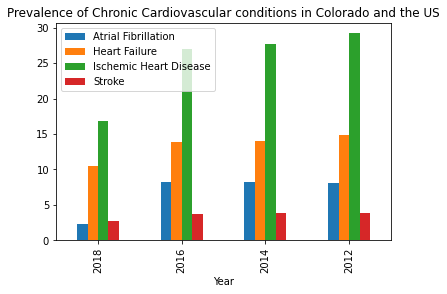

In [102]:
PrevCVD.groupby('Location').plot(kind='bar', x= 'Year' ,y =['Atrial Fibrillation', 'Heart Failure', 'Ischemic Heart Disease', 'Stroke'], title= 'Prevalence of Chronic Cardiovascular conditions in Colorado and the US')


The litature suggests that incidence of atrial fibrillation is increasing over time. I subsetted Atrial fibrillation to compare rates ithe the US and Colorado.

In [103]:
AF=PrevCVD[['Location', 'Year','Atrial Fibrillation']]



[Text(0, 0.5, 'Percentage'),
 Text(0.5, 1.0, 'Prevalence of Atrial Fibrillation in Colorado and the US')]

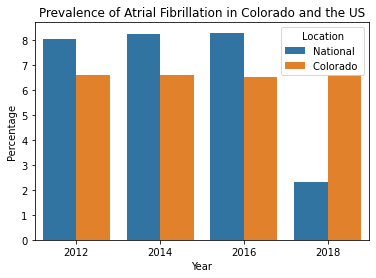

In [11]:
sns.barplot(data= AF, x='Year', y='Atrial Fibrillation', hue='Location').set(title="Prevalence of Atrial Fibrillation in Colorado and the US", ylabel='Percentage')


The bar graph above does not support the literature. It shows Prevalnce of atrial fibrillation to be fairly constant in Colorado, and shows a substantial drop Nationally. However, this may be due to  the methods used the gather data, and would not draw conclusions

From the Medicare Website I extracted data for spending, ER utilization and Readmission rates for chronic conditions for each year.
I imported the files into the jupiter notebook and converted each of the files to a dataframe.
I added the year to each file for analysis.

In [84]:
total2018=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2018.xlsx', sheet_name='Actual Spending')
total2018.loc[:,'Year']= '2018'
ER2018=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2018.xlsx', sheet_name='ED Visits')
ER2018.loc[:,'Year']='2018'
ReAdm2018=total2018=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2018.xlsx', sheet_name='Readmissions')
ReAdm2018.loc[:,'Year']='2018'
total2016=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2016.xlsx', sheet_name='Actual Spending')
total2016.loc[:,'Year']='2016'
ER2016=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2016.xlsx', sheet_name='ED Visits')
ER2016.loc[:,'Year']='2016'
ReAdm2016=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2016.xlsx', sheet_name='Readmissions')
total2014=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2014.xlsx', sheet_name='Actual Spending')
ER2014=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2014.xlsx', sheet_name='ED Visits')
ReAdm2014=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2014.xlsx', sheet_name='Readmissions')
total2012=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2012.xlsx', sheet_name='Actual Spending')
ER2012=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2012.xlsx', sheet_name='ED Visits')
ReAdm2012=pd.read_excel('State_Table_Chronic_Conditions_Utiliz_Spend_2012.xlsx', sheet_name='Readmissions')
ReAdm2016.loc[:,'Year']='2016'
ReAdm2014.loc[:,'Year']='2014'
ReAdm2012.loc[:,'Year']='2012'
total2014.loc[:,'Year']='2014'
total2012.loc[:,'Year']='2012'
ER2014.loc[:,'Year']='2014'
ER2012.loc[:,'Year']='2012'
# I am sure there is a loop that would read all of the files into Jupyter in a more consise manner, I was not able to write a working function to accomplish this.

Next I filtered the data to obtain National and Colorado  data.

In [85]:
#total2018.set_index("State")
#COtotal2018
subtotal2018=total2018[0:7]
Nattotal2018=subtotal2018.drop([1,2,3,4,5,6])
Nattotal2018
COtotal2018=subtotal2018.drop([0,1,2,3,4,5])
Compartotal2018=subtotal2018.drop([1,2,3,4,5,])
Compartotal2018
#subtotal2016= total2016[total2016['State']=='National']
subtotal2016=total2016[0:7]
Nattotal2016=subtotal2016.drop([1,2,3,4,5,6])
Nattotal2016
COtotal2016=subtotal2016.drop([0,1,2,3,4,5])
Compartotal2016=subtotal2016.drop([1,2,3,4,5,])
Compartotal2016
subtotal2014=total2014[0:7]
Nattotal2014=subtotal2014.drop([1,2,3,4,5,6])
Nattotal2014
COtotal2014=subtotal2014.drop([0,1,2,3,4,5])
Compartotal2014=subtotal2014.drop([1,2,3,4,5,])
subtotal2012=total2012[0:7]
Nattotal2012=subtotal2012.drop([1,2,3,4,5,6])
Nattotal2012
COtotal2012=subtotal2012.drop([0,1,2,3,4,5])
Compartotal2012=subtotal2012.drop([1,2,3,4,5,])
# I was not able to filter data using- #COtotal2018=total2018[total2018['State']=='Colorado']- 
#the data field were empty. I'm not sure if I configured the code incorrectly or this is something that happens when you import data from excel.
#Inorder to obain the select data, I needed to drop rows.

I combined the subsetted dataframe for each year into one datafram for analysis.
I then pulled out the cardiovascular conditions for ease of visualization.

In [14]:
ComarpCVDtotal2018=Compartotal2018[['State', 'Atrial Fibrillation ', 'Heart Failure ', 'Ischemic Heart Disease ', 'Stroke ', 'Year']]
CVDtotal2018=total2018[['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ','Ischemic Heart Disease ', 'Year']]
ComptotalAll=pd.concat([Compartotal2012,Compartotal2014, Compartotal2016, Compartotal2018], axis=0, ignore_index=False)
ComptotalCVD=ComptotalAll[['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ','Ischemic Heart Disease ' ,'Year']]
ComptotalCVD[['Atrial Fibrillation ', 'Heart Failure ','Stroke ','Ischemic Heart Disease ']]= ComptotalCVD[['Atrial Fibrillation ', 'Heart Failure ','Stroke ','Ischemic Heart Disease ']].apply(pd.to_numeric)
                                                                                 
CVDtotal2016=total2016[['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ','Ischemic Heart Disease ', 'Year']]
CVDtotal2014=total2014[['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ', 'Ischemic Heart Disease ','Year']]
CVDtotal2012=total2012[['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ', 'Ischemic Heart Disease ', 'Year']]
CVDtotalAll=pd.concat([CVDtotal2018, CVDtotal2016,CVDtotal2014,CVDtotal2014], axis=0, ignore_index=False )
#CVDtotComp=CVDtotalAll[CVDtotalAll['State']=='National']|CVDtotalAll[CVDtotalAll['State']=='Colorado']
CVDtotalCom=CVDtotalAll[0:7]
CVDtotalNat=CVDtotalCom.drop([1,2,3,4,5,6])
CVDtotalCO=CVDtotalCom.drop([0,1,2,3,4,5])
CVDtotalCom=CVDtotalCom.drop([1,2,3,4,5,])
#ComptotalCVD
#year=['2012','2012', '2014','2014','2016','2016', '2018', '2018']
#ComptotalCVD.loc[:,'Year']= ['2012','2012', '2014','2014','2016','2016', '2018', '2018']
#mean_spending=ComptotalCVD.groupby('State')['State', 'Atrial Fibrillation ', 'Heart Failure ','Stroke ', 'Year'].mean()
#ComptotalCVD.dtypes

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


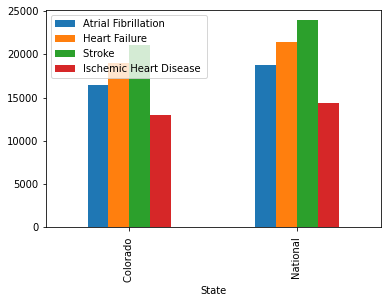

In [92]:
avg_spendAF=ComptotalCVD.groupby('State')['Atrial Fibrillation '].mean()
avg_spendAF
avg_spendCVD=ComptotalCVD.groupby('State')['Atrial Fibrillation ','Heart Failure ','Stroke ', 'Ischemic Heart Disease '].mean()
avg_spendCVD.plot(kind='bar')


The above graph provides the average per capita spending both natioanlly and in Colorado for each conditon for 2012-2018

Programs for Primary and Secondary Prevention of Ischemic Heart Disease are common and well funded.
There are many programs that focus on reducing the morbidity and mortality of Heart Failure.
There are not robust programs in the US targeting reduction of cost for Atrial Fibrillation. Average cost data demonstrates that per capita more is spent for atrial fibrillation then Ischemic Heart Disease.

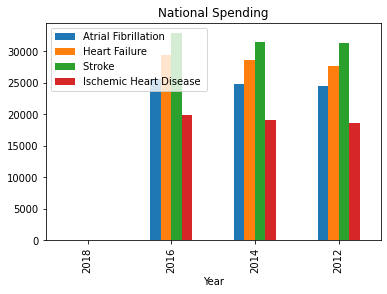

In [96]:
UStotal=pd.concat([Nattotal2018,  Nattotal2016, Nattotal2014, Nattotal2012],axis=0, ignore_index=False)
UStotalCVD=UStotal[['Year','Atrial Fibrillation ','Heart Failure ','Stroke ','Ischemic Heart Disease ']].apply(pd.to_numeric)
UStotalCVD.plot(kind='bar', x='Year', title ='National Spending', )


In [17]:
UStotalCVD1=UStotalCVD[['Atrial Fibrillation ','Heart Failure ','Stroke ','Ischemic Heart Disease ']]
UStotalCVD1=UStotalCVD1.transpose()
UStotalCVD1.columns=['2018', '2016','2014', '2012']
#UStotalCVD.dtypes

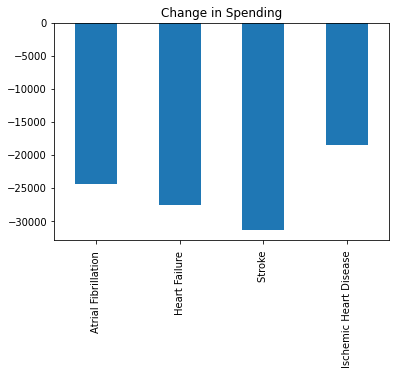

In [106]:
def d(a, b):
    return a-b
""" This function is to determine the difference in data"""
Spending_diff= UStotalCVD1.apply(lambda f: d(f['2018'], f['2012']), axis=1)

US_Spend_summ=UStotalCVD.describe()

Spending_diff.plot(kind='bar', title='Change in Spending')

The Above barplot demonstrates the change in spending from 2012 to 2018.

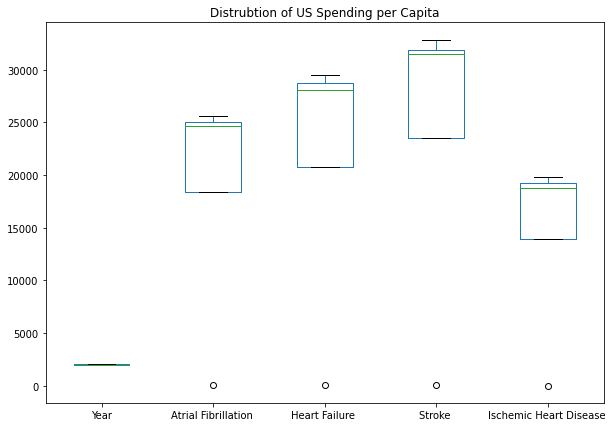

In [99]:

boxplot=UStotalCVD.plot(kind='box', grid= False, figsize=[10,7], title='Distrubtion of US Spending per Capita')

Next I subsetted readmission data for the US and Colorado

Hospital readmissions are expressed as a percentage of all admissions. A 30-day readmission is defined as an admission to an acute care hospital for any cause within 30 days of discharge from an acute care hospital. Except when the patient died during the stay, each inpatient stay is classified as an index admission, a readmission, or both. 

In [21]:
subReAdm2018=ReAdm2018[0:7]
NatReAdm2018=subReAdm2018.drop([1,2,3,4,5,6])
COReAdm2018=subReAdm2018.drop([0,1,2,3,4,5])
ComparReAdm2018=subReAdm2018.drop([1,2,3,4,5,])

subReAdm2016=ReAdm2016[0:7]
NatReAdm2016=subReAdm2016.drop([1,2,3,4,5,6])
COReAdm2016=subReAdm2016.drop([0,1,2,3,4,5])
ComparReAdm2016=subReAdm2016.drop([1,2,3,4,5,])

subReAdm2014=ReAdm2014[0:7]
NatReAdm2014=subReAdm2014.drop([1,2,3,4,5,6])
COReAdm2014=subReAdm2014.drop([0,1,2,3,4,5])
ComparReAdm2014=subReAdm2014.drop([1,2,3,4,5,])

subReAdm2012=ReAdm2012[0:7]
NatReAdm2012=subReAdm2012.drop([1,2,3,4,5,6])
COReAdm2012=subReAdm2012.drop([0,1,2,3,4,5])
ComparReAdm2012=subReAdm2012.drop([1,2,3,4,5,])
ComparReAdm2014.columns
#ComparReAdm2016

Index(['State', 'State FIPS Code', 'Alcohol Abuse',
       'Alzheimer's Disease/Dementia ', 'Arthritis ', 'Asthma ',
       'Atrial Fibrillation ', 'Autism Spectrum Disorders ', 'Cancer ',
       'Chronic Kidney Disease ', 'COPD ', 'Depression ', 'Diabetes ',
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure ',
       'Hepatitis                                      (Chronic Viral B & C)',
       'Hyperlipidemia ', 'Hypertension ', 'Ischemic Heart Disease ',
       'Osteoporosis ', 'Schizophrenia/Other Psychotic Disorders ', 'Stroke ',
       'Year'],
      dtype='object')

After filtering out Colorado and National data for each year, I combined the dataframes.

In [110]:
totalReadm=pd.concat([ComparReAdm2018,ComparReAdm2016, ComparReAdm2014,ComparReAdm2012], axis=0, ignore_index=False )
CO_Readm= pd.concat([COReAdm2018, COReAdm2016, COReAdm2014, COReAdm2012], axis=0, ignore_index=False)
US_Readm= pd.concat([NatReAdm2018, NatReAdm2016, NatReAdm2014, NatReAdm2012], axis=0, ignore_index=False).infer_objects()
CVD_Readm= totalReadm[['State','Year', 'Atrial Fibrillation ','Heart Failure ', 'Ischemic Heart Disease ', 'Stroke ']]
CVD_Readm=CVD_Readm.reset_index()
CVD_Readm=CVD_Readm.infer_objects()
CO_CVD_RA=CO_Readm[['State','Year', 'Atrial Fibrillation ','Heart Failure ', 'Ischemic Heart Disease ', 'Stroke ']]
CO_CVD_RA
Readm_Summ=CVD_Readm.groupby('State')[ 'Atrial Fibrillation ','Heart Failure ', 'Ischemic Heart Disease ', 'Stroke '].describe()
Readm_Summ
CVD_Readm
US_Readm
US_CVD_RA= US_Readm[['State','Year', 'Atrial Fibrillation ','Heart Failure ', 'Ischemic Heart Disease ', 'Stroke ']]
US_CVD_RA


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,6,6,6,6
State,Colorado,Colorado,Colorado,Colorado
Year,2018,2016,2014,2012
Atrial Fibrillation,19.24,19.26,19.17,20.32
Heart Failure,20.79,21.04,20.81,21.88
Ischemic Heart Disease,18.32,18.14,18.25,18.65
Stroke,19.15,18.53,18.43,17.9


I transposed the Colorado dataframe to calculate the difference in readmission over time. I then had to convert the data types from objects to numeric.

In [132]:
CO_CVD_RA1=CO_CVD_RA[['Atrial Fibrillation ','Heart Failure ', 'Ischemic Heart Disease ', 'Stroke ']]
CO_CVD_RA1=CO_CVD_RA1.transpose()
CO_CVD_RA1.columns=['2018', '2016','2014', '2012']
CO_CVD_RA1=CO_CVD_RA1.apply(pd.to_numeric)
CO_CVD_RA1.dtypes
CO_CVD_RA1.columns
CO_CVD_RA1

,2018,2016,2014,2012
Atrial Fibrillation,19.24,19.26,19.17,20.32
Heart Failure,20.79,21.04,20.81,21.88
Ischemic Heart Disease,18.32,18.14,18.25,18.65
Stroke,19.15,18.53,18.43,17.90


Atrial Fibrillation       -1.08
Heart Failure             -1.09
Ischemic Heart Disease    -0.33
Stroke                     1.25
dtype: float64

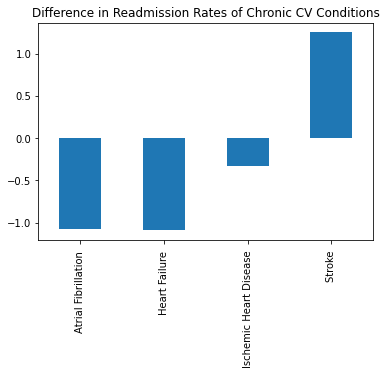

In [131]:
readm_diff= CO_CVD_RA1.apply(lambda f: d(f['2018'], f['2012']), axis=1)
readm_diff.plot(kind='bar', title= 'Difference in Readmission Rates of Chronic CV Conditions')
readm_diff

The graph above shows the change in readmission rates in Colorado from 2012 to 2018. There was very little change in rates during this time period.
The graph below shows the readmission rated for for all the CVD Chronic Conditions per year. The first graph is Colorado, the second is the US.

State
Colorado     AxesSubplot(0.125,0.125;0.775x0.755)
National     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

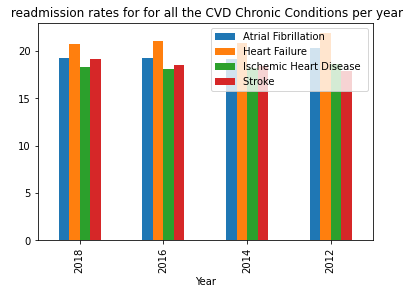

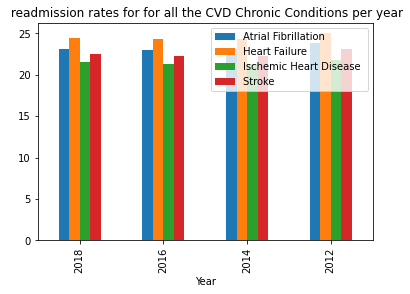

In [148]:
CVD_Readm.groupby('State').plot(kind='bar', x= 'Year' ,y =['Atrial Fibrillation ', 'Heart Failure ', 'Ischemic Heart Disease ', 'Stroke '], title=' readmission rates for for all the CVD Chronic Conditions per year')


Medicare also had data on prevalence of chronic conditions either by iteslf or with other cormorbid conditions. 

In [135]:
cc_data= pd.read_excel('Copy of State_Dashboard_Data_Table_2018.xlsx',sheet_name='Prevalence')
cc_data.columns

Index(['State', 'Chronic Condition', 'Gender', 'Age Group', 'Enrollment',
       'Chronic Condition Prevalence %',
       'Chronic Condition Co-Morbidity: Prevalence Only Condition %',
       'Chronic Condition Co-Morbidity: Prevalence of Condition and 1-2 Other Conditions (%)',
       'Chronic Condition Co-Morbidity: Prevalence of Condition and 3-4 Other Conditions (%)',
       'Chronic Condition Co-Morbidity: Prevalence of Condition and 5+ Other Conditions (%)'],
      dtype='object')

I edited the column names for simplicity

In [137]:
cc_data=cc_data.rename(columns={'Chronic Condition':'Condition', 'Chronic Condition Prevalence %':'Prevalence',
                        'Chronic Condition Co-Morbidity: Prevalence Only Condition %':'Lone', 
                       'Chronic Condition Co-Morbidity: Prevalence of Condition and 1-2 Other Conditions (%)':'1-2 Co_Morb',
                       'Chronic Condition Co-Morbidity: Prevalence of Condition and 3-4 Other Conditions (%)':'3-4 Co_Morb',
                       'Chronic Condition Co-Morbidity: Prevalence of Condition and 5+ Other Conditions (%)': '5+ Co_Morb'})
#cc_data

For ease in reviewing I changed the rate to a percentage by multipling by 100

In [138]:
cc_data['Condition'].value_counts()
cc_data['Prevalence']=cc_data['Prevalence']*100
cc_data['Lone']=cc_data['Lone']*100
cc_data['1-2 Co_Morb']=cc_data['1-2 Co_Morb']*100
cc_data['3-4 Co_Morb']=cc_data['3-4 Co_Morb']*100
cc_data['5+ Co_Morb']=cc_data['5+ Co_Morb']*100

I then filtered out the Colorado data

In [140]:
CO= cc_data[cc_data['State']=='Colorado']
CO_All=CO[CO['Enrollment']=='All']
CO_All=CO_All[CO_All['Gender']=='All']
CO_All=CO_All[CO_All['Age Group']=='All']
#CO_All['Prevalence', 'Lone', '1-2 Co_Morb', '3-4 Co_Morb', '5+ Co_Morb']=CO_All['Prevalence', 'Lone', '1-2 Co_Morb', '3-4 Co_Morb', '5+ Co_Morb'].apply(CO_All['Prevalence', 'Lone',
CO_All

,State,Condition,Gender,Age Group,Enrollment,Prevalence,Lone,1-2 Co_Morb,3-4 Co_Morb,5+ Co_Morb
3408,Colorado,Alcohol Abuse,All,All,All,2.11,6.11,26.44,29.28,38.17
3435,Colorado,Alzheimer's Disease/Dementia,All,All,All,8.68,7.35,23.76,28.51,40.37
3462,Colorado,Arthritis,All,All,All,30.73,13.89,34.68,27.80,23.63
3489,Colorado,Asthma,All,All,All,4.48,6.48,27.36,30.07,36.08
3516,Colorado,Atrial Fibrillation,All,All,All,6.60,2.80,18.89,29.70,48.61
3543,Colorado,Autism Spectrum Disorders,All,All,All,0.19,32.38,41.05,15.70,10.87
3570,Colorado,COPD,All,All,All,9.37,4.25,20.50,28.80,46.45
3597,Colorado,Cancer,All,All,All,7.40,10.85,31.91,28.97,28.28
3624,Colorado,Chronic Kidney Disease,All,All,All,19.15,2.83,21.44,34.67,41.06
3651,Colorado,Depression,All,All,All,16.51,9.67,29.73,28.69,31.91


I elecated to not graph this data, as I had already created graphs for similar data

In [141]:
National=cc_data[cc_data['Enrollment']=='All']
National_All=National[National['State']=='National']
National_All2=National_All[National_All['Age Group']=='All']
National_All2= National_All2[National_All2['Gender']=='All']
#National_All2=National_All2[National_All2['State']=='National']
National_All
National2=National[National['State']=='National']
#National_All2['Prevalence']

In [144]:
Graph1=pd.concat([CO_All, National_All2], axis=0, ignore_index=False)


Again, as I had already created similar graphs I elected to not create visulisations of the above  data

The Last data set contained 30 day readmssion rates at the natiional, state and hospital level for a selected time frame.
It was downloaded locally, then uploaded into the notebook

In [55]:
data=pd.read_csv('FY_2021_Hospital_Readmissions_Reduction_Program_Hospital (1).csv')
data.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

The column names were edited for simplicity

In [145]:
data=data.rename(columns={ 'Measure Name': 'measure', 'Facility Name':'facility'})

The readmission rates for the CVD data were filtered, each into its own dataframe. The Columns were again renamed for ease in merging the dataframes.

In [146]:
hf=data[data['measure']== 'READM-30-HF-HRRP']
hf
hf=hf.rename(columns={'measure':'hf', 'Number of Discharges':'hf_DC','Number of Readmissions':'hf_RA','Expected Readmission Rate':'hf_expRR','Excess Readmission Ratio':'hf_excessRR'})
cabg=data[data['measure']== 'READM-30-CABG-HRRP']
cabg=cabg.rename(columns={'measure':'cabg', 'Number of Discharges':'cabg_DC','Number of Readmissions':'cabg_RA','Expected Readmission Rate':'cabg_expRR','Excess Readmission Ratio':'cabg_excessRR'})
cabg
ami=data[data['measure']== 'READM-30-AMI-HRRP']
ami=ami.rename(columns={'measure':'ami', 'Number of Discharges':'ami_DC','Number of Readmissions':'ami_RA','Expected Readmission Rate':'ami_expRR','Excess Readmission Ratio':'ami_excessRR'})


The data frames were merged, and values that had listed " too few to report" were converted to NAN

In [147]:
cardiac= pd.merge(hf, ami, on ='facility', how='outer')
cardiac=pd.merge(cardiac, cabg, how='outer', on='facility')
cardiac=cardiac[['facility', 'State', 'ami_DC', 'ami_RA',  'ami_expRR', 'ami_excessRR', 'hf_DC', 'hf_RA', 'hf_expRR', 'hf_excessRR', 'cabg_DC', 'cabg_RA', 'cabg_expRR', 'cabg_excessRR']]
#cardiac=cardiac[['facility', 'State', 'hf', 'hf_DC','hf_excessRR','hf_RA', 'ami', 'ami_DC', 'ami_excessRR','ami_RA', 'cabg', 'cabg_DC', 'cabg_excessRR', 'cabg_RA']]
cardiac.replace(to_replace='Too Few to Report', value= 'NaN',regex=False, inplace=True)

Columns were converted to numeric. The total discharges and readmissions for each state were calcuated by grouping by state, the summing.

Averages and medians were then calculated, and a new dataframe created with the means, medians, discharge and readmission rates.

In [60]:
cardiac[['hf_RA','ami_RA', 'cabg_RA' ]]=cardiac[['hf_RA','ami_RA', 'cabg_RA' ]].astype('float64')
states= cardiac.groupby(['State']).agg({'hf_DC':['sum', 'mean', 'median'], 'cabg_DC':['sum', 'mean', 'median'],'ami_DC':['sum', 'mean', 'median'],'hf_RA':['sum', 'mean', 'median'], 'ami_RA':['sum', 'mean', 'median'], 'cabg_RA':['sum', 'mean', 'median'] })
statesSum=cardiac.groupby(['State']).sum()

statesSum=statesSum[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesSum['totalDC']= statesSum['ami_DC'] + statesSum['hf_DC']+ statesSum['cabg_DC']
statesTotal=statesSum.rename(columns={'ami_DC':'ami_dc_T', 'ami_RA':'ami_ra_T', 'hf_DC':'hf_dc_T', 'hf_RA':'hf_ra_T', 'cabg_DC':'cabg_dc_T', 'cabg_RA':'cabg_ra_T'})

statesAvg=cardiac.groupby(['State']).mean()
statesAvg=statesAvg[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesAvg=statesAvg.rename(columns={'ami_DC':'ami_dc_avg', 'ami_RA':'ami_ra_avg', 'hf_DC':'hf_dc_avg', 'hf_RA':'hf_ra_avg', 'cabg_DC':'cabg_dc_avg', 'cabg_RA':'cabg_ra-avg'})
statesMed=cardiac.groupby(['State']).median()
statessummary=cardiac.groupby(['State']).describe()
statesMed=statesMed[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
summary1=statessummary[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesMed=statesMed.rename(columns={'ami_DC':'ami_dc_Med', 'ami_RA':'ami_ra_Med', 'hf_DC':'hf_dc_med', 'hf_RA':'hf_ra_med', 'cabg_DC':'cabg_dc_med', 'cabg_RA':'cabg_ra-Med'})

statesMed
StateData=pd.merge(statesTotal, statesAvg, how='outer', on='State')
StateData=pd.merge(StateData,statesMed, how='outer', on='State')
StateData.columns

Index(['ami_dc_T', 'ami_ra_T', 'hf_dc_T', 'hf_ra_T', 'cabg_dc_T', 'cabg_ra_T',
       'totalDC', 'ami_dc_avg', 'ami_ra_avg', 'hf_dc_avg', 'hf_ra_avg',
       'cabg_dc_avg', 'cabg_ra-avg', 'ami_dc_Med', 'ami_ra_Med', 'hf_dc_med',
       'hf_ra_med', 'cabg_dc_med', 'cabg_ra-Med'],
      dtype='object')

Text(0, 0.5, 'Number of readmission')

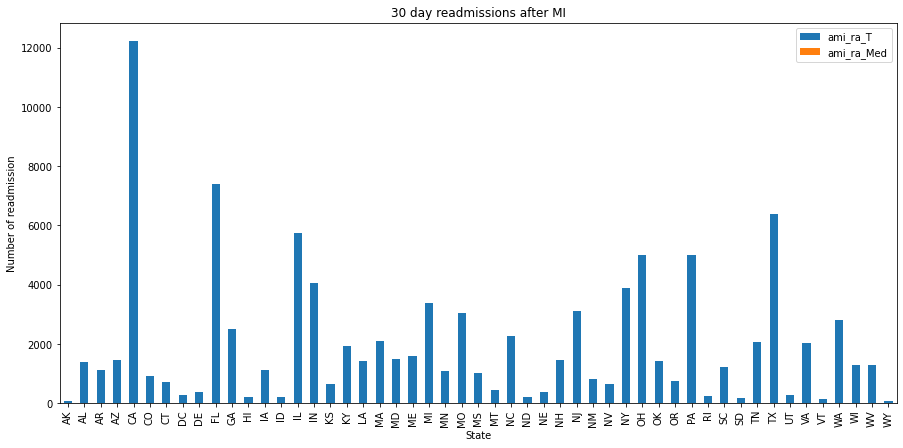

In [151]:
StateDataAMI=StateData[[ 'ami_ra_T','ami_ra_Med']]
StateDataAMI.plot(kind='bar', title= '30 day readmissions after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")
summary=StateData.describe()
StateDataAMI['ami_ra_T'].plot(kind='bar', x= 'State',y='ami_ra_T', title='30 day readmission after MI', figsize=[15, 7])
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")

Text(0, 0.5, 'Median Number of readmission')

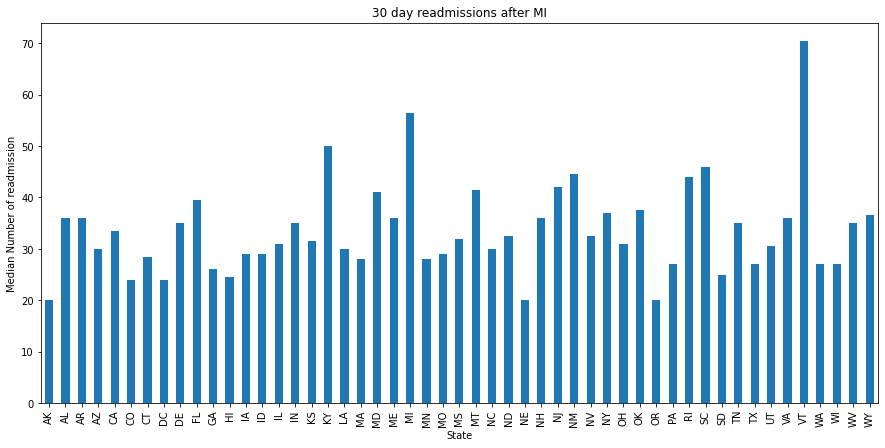

In [152]:
StateDataAMI['ami_ra_Med'].plot(kind='bar', x='State', y='ami_ra_Med', title='30 day readmission after MI', figsize=[15,7])
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Median Number of readmission")

To assess the difference in hospitals, I filtered by hospitals in the Denver Metro area and combined them in a dataset. 
After the dataframe was created, I had to chnage on the the columns to numeric.
The graph is comprised of the hospital measures.

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


facility
BOULDER COMMUNITY HEALTH                     AxesSubplot(0.125,0.125;0.775x0.755)
CENTURA HEALTH-PORTER ADVENTIST HOSPITAL     AxesSubplot(0.125,0.125;0.775x0.755)
GOOD SAMARITAN MEDICAL CENTER LLC            AxesSubplot(0.125,0.125;0.775x0.755)
LUTHERAN MEDICAL CENTER                      AxesSubplot(0.125,0.125;0.775x0.755)
NORTH SUBURBAN MEDICAL CENTER                AxesSubplot(0.125,0.125;0.775x0.755)
ROSE MEDICAL CENTER                          AxesSubplot(0.125,0.125;0.775x0.755)
SAINT JOSEPH HOSPITAL                        AxesSubplot(0.125,0.125;0.775x0.755)
UNIVERSITY OF COLORADO HOSPITAL AUTHORITY    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

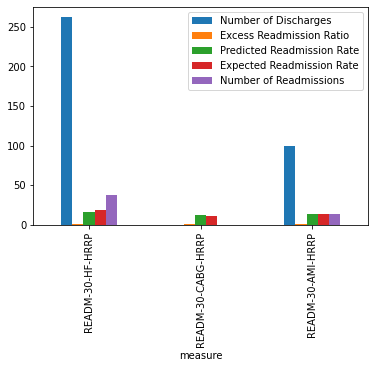

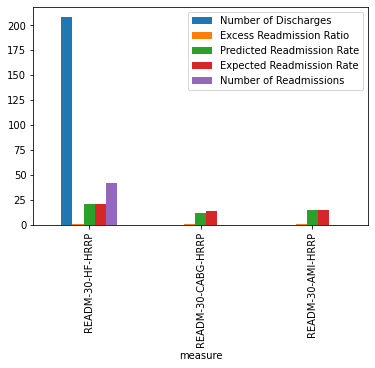

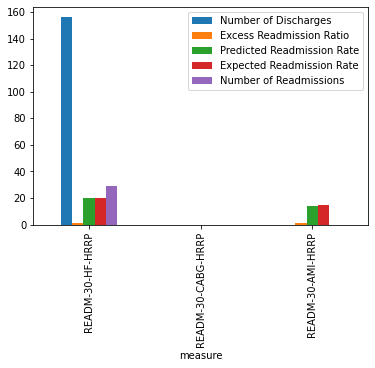

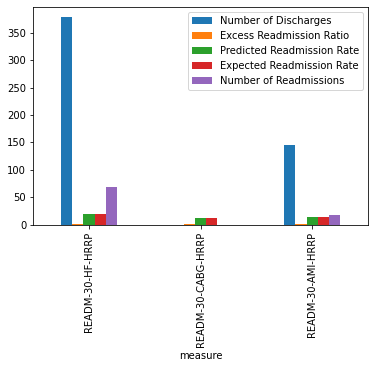

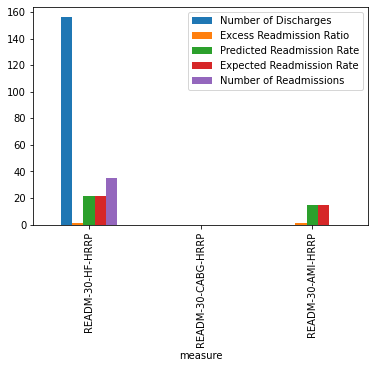

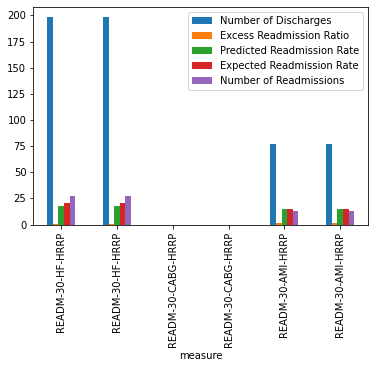

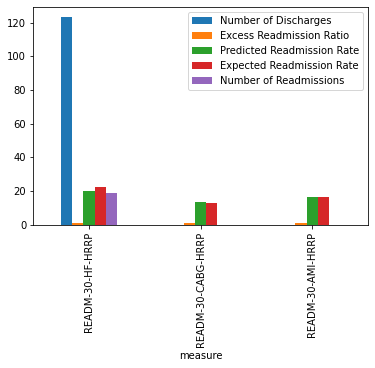

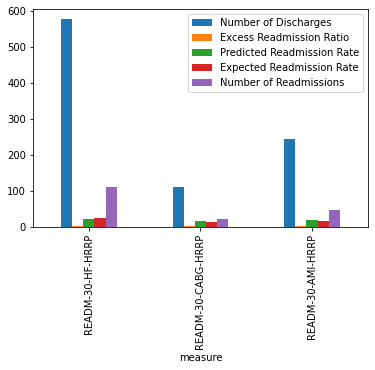

In [172]:
CO= data[data['State']=='CO']
SJH=CO[CO['facility']=='SAINT JOSEPH HOSPITAL']
SJH
GSH=CO[CO['facility']=='GOOD SAMARITAN MEDICAL CENTER LLC']
GSH
LMC=CO[CO['facility']== 'LUTHERAN MEDICAL CENTER']
LMC
BCH=CO[CO['facility']=='BOULDER COMMUNITY HEALTH']
BCH
UCH=CO[CO['facility']=='UNIVERSITY OF COLORADO HOSPITAL AUTHORITY']
UCH
MMC=CO[CO['facility']==' MCKEE MEDICAL CENTER']
RMC=CO[CO['facility']=='ROSE MEDICAL CENTER']
SMC=CO[CO['facility']=='ROSE MEDICAL CENTER']
Porter=CO[CO['facility']=='CENTURA HEALTH-PORTER ADVENTIST HOSPITAL']
NSMC=CO[CO['facility']=='NORTH SUBURBAN MEDICAL CENTER']
HOSP=pd.concat([SJH, GSH, LMC, BCH, UCH, MMC, RMC, SMC, Porter, NSMC ], axis=0, ignore_index=False).infer_objects()  
HOSP
hos_hf=HOSP[HOSP['measure']=='READM-30-HF-HRRP']
hos_CABG=HOSP[HOSP['measure']=='READM-30-CABG-HRRP']
hos_AMI=HOSP[HOSP['measure']=='READM-30-AMI-HRRP']
hosp_CVD=pd.concat([hos_hf, hos_CABG, hos_AMI], axis=0, ignore_index=False)
hosp_CVD
hosp_CVD2=hosp_CVD[['facility','measure', 'Number of Discharges','Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions' ]]
hosp_CVD2.replace(to_replace='Too Few to Report', value= 'NaN',regex=False, inplace=True)
hosp_CVD2['Number of Readmissions']=hosp_CVD2['Number of Readmissions'].apply(pd.to_numeric, errors='coerce')
#'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions' ].apply(pd.to_numeric)
hosp_CVD2.groupby('facility').plot(kind='bar', x='measure', y=['Number of Discharges','Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions'])
                            


This anaysis can be helpful for public health officals and quaility improvement staff at the hospital level. 
There are data repositories that contain patient level information and more detailed hospital level data that would provide a more robust analysis.
However these repsitories are owned or managemed by groupd who control access. Thus I did not have access to them. A data analyst from the individual insitution would have access, 
this project demonstrates how data can be obtained for comparison and benchmarking.

In [ ]:
%%bash
git pull
git add Final_Project.ipynb
git commit -a -m "Submitting the Final Project"
git push